In [1]:
import re


In [235]:
index_pattern = re.compile(r'[\d+\w+] INFO: (\w+) is created')
result_pattern = re.compile(r'[\d+\w+]INFO:---------probes\[(\d+)\]bs\[(\d+)\]avg\.time\[(\d+\.\d+)ms\]accuracy\[(\d+\.\d+)\]\[(\d+\.\d+)\/\d\]\[(\d+\.\d+)M\]')
thresh_pattern = re.compile(r'[\d+\w+] INFO: thresh \[(\d.\d)\]')

data = []
with open('/media/allen/mass/Mega_Search/external/faiss03.txt') as f:
    for line in f:
        thresh_line = line.strip()
        thresh_re = thresh_pattern.search(thresh_line)
        if thresh_re is not None:
            thresh = thresh_re.groups()[0]
        else:
            index_line = line.strip().replace(",","")
            index_re = index_pattern.search(index_line)
            if index_re is not None:
                index = index_re.groups()[0]
            else:
                result_line = line.strip().replace(" ","")
                result_re = result_pattern.search(result_line)
                if result_re is not None:
                    nprobe, bs, latency, acc, cpu, mem = result_re.groups()
                    data.append([float(thresh), index, int(nprobe), int(bs), float(latency), float(acc), float(cpu), float(mem)])
                   


In [236]:
data0 = []
with open('/media/allen/mass/Mega_Search/external/faiss02.txt') as f:
    for line in f:
        thresh_line = line.strip()
        thresh_re = thresh_pattern.search(thresh_line)
        if thresh_re is not None:
            thresh = thresh_re.groups()[0]
        else:
            index_line = line.strip().replace(",","")
            index_re = index_pattern.search(index_line)
            if index_re is not None:
                index = index_re.groups()[0]
            else:
                result_line = line.strip().replace(" ","")
                result_re = result_pattern.search(result_line)
                if result_re is not None:
                    nprobe, bs, latency, acc, cpu, mem = result_re.groups()
                    data0.append([float(thresh), index, int(nprobe), int(bs), float(latency), float(acc), float(cpu), float(mem)])
   

In [237]:
result_pattern = re.compile(r'[\d+\w+]INFO:---------avg\.time\[(\d+\.\d+)ms\]accuracy\[(\d+\.\d+)\]\[(\d+\.\d+)\/\d\]\[(\d+\.\d+)M\]')
thresh_pattern = re.compile(r'[\d+\w+] INFO: thresh \[(\d.\d)\]')


basedata = []
with open('/media/allen/mass/Mega_Search/external/baseline.txt') as f:
    for line in f:
        thresh_line = line.strip()
        thresh_re = thresh_pattern.search(thresh_line)
        if thresh_re is not None:
            thresh = thresh_re.groups()[0]
        else:           
            result_line = line.strip().replace(" ","")
            result_re = result_pattern.search(result_line)
            if result_re is not None:
                latency, acc, cpu, mem = result_re.groups()
                basedata.append([float(thresh), 'baseline', 0, 10, float(latency), float(acc), float(cpu), float(mem)])
           

In [238]:
result_pattern = re.compile(r'[\d+\w+]INFO:---------probes\[(\d+)\]avg\.time\[(\d+\.\d+)ms\]accuracy\[(\d+\.\d+)\]\[(\d+\.\d+)\/\d\]\[(\d+\.\d+)M\]')
thresh_pattern = re.compile(r'[\d+\w+] INFO: thresh \[(\d.\d)\]')


falconndata = []
with open('/media/allen/mass/Mega_Search/external/falconn.txt') as f:
    for line in f:
        thresh_line = line.strip()
        thresh_re = thresh_pattern.search(thresh_line)
        if thresh_re is not None:
            thresh = thresh_re.groups()[0]
        else:           
            result_line = line.strip().replace(" ","")
            result_re = result_pattern.search(result_line)
            if result_re is not None:
                nprobe, latency, acc, cpu, mem = result_re.groups()
                falconndata.append([float(thresh), 'FALCONN', int(nprobe), 10, float(latency), float(acc), float(cpu), float(mem)])
           

In [239]:
result_pattern = re.compile(r'[\d+\w+]INFO:---------probes\[(\d+)\]prob\[(\d\.\d)\]avg\.time\[(\d+\.\d+)ms\]accuracy\[(\d+\.\d+)\]')
thresh_pattern = re.compile(r'[\d+\w+] INFO: thresh \[(\d.\d)\]')

puffinndata = []
with open('/media/allen/mass/Mega_Search/external/puffinn.txt') as f:
    for line in f:
        thresh_line = line.strip()
        thresh_re = thresh_pattern.search(thresh_line)
        if thresh_re is not None:
            thresh = thresh_re.groups()[0]
        else:            
            result_line = line.strip().replace(" ","")
            result_re = result_pattern.search(result_line)
            if result_re is not None:
                nprobe, prob, latency, acc = result_re.groups()
                if prob == '0.5':
                    bs = 10
                else:
                    bs = 1
                puffinndata.append([float(thresh), 'PUFFINN', int(nprobe), int(bs), float(latency), float(acc), float(100), float(100)])
                
#         break

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set(font_scale=1)


In [240]:
df = pd.DataFrame(data0 + data + falconndata + puffinndata + basedata, columns=['thresh', 'Index', 'nprobe', 'bs', 'latency', 'acc', 'cpu', 'mem'])

In [107]:
len(df.Index.unique())

13

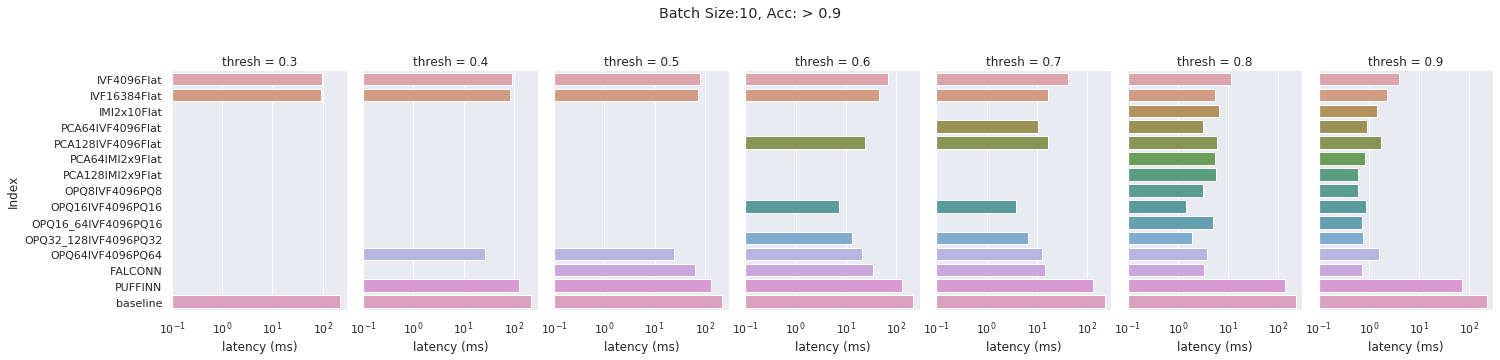

In [241]:
g = sns.catplot(x="latency", y="Index", col="thresh",
                data=df[(df.bs==10)&(df.acc>0.9)], saturation=.5,
                kind="bar", ci=None, aspect=.6)
for ax in g.axes[0]:
    ax.set_xscale('log')
    ax.set_xlim([0.1,300])
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Batch Size:10, Acc: > 0.9')
g.set_xlabels('latency (ms)')
# g.map(plt.hist, 'latency')
# (g.set_axis_labels("", "Survival Rate")
#   .set_xticklabels(["Men", "Women", "Children"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True))

In [132]:
bestdf = df[(df.bs==10)&(df.acc==1.0)&(df.thresh==0.9)]

In [212]:
for idx in range(9,4,-1):

    tempdf = df[(df.bs==10)&(df.acc!=1.0)&(df.acc>idx/10)]
    diffdf = []
    for index in tempdf.Index.unique():
        _df = tempdf[tempdf.Index==index]
        benchmark = bestdf[bestdf.Index==index].latency
        if len(benchmark) == 0:
            diff = (0 - _df.latency).apply(lambda x: np.clip(x, 0, np.Inf))
        else:
            diff = (benchmark.iloc[0] - _df.latency).apply(lambda x: np.clip(x, 0, np.Inf))
        diffdf.append(diff)
    if len(diffdf) > 0:
        df[f"diff{idx}"] = pd.concat(diffdf)
    else:
        df[f"diff{idx}"] = 0

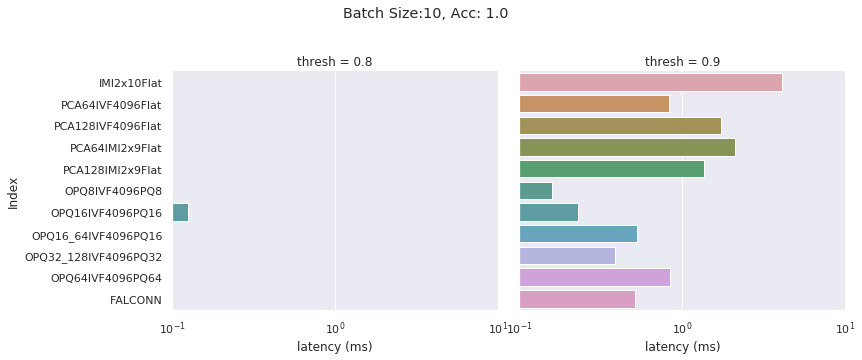

In [214]:
g = sns.catplot(x="diff8", y="Index", col="thresh",
                data=df[(df.bs==10)&(df.acc>0.9)&(df.diff8>0)], saturation=.5,
                kind="bar", ci=None, aspect=1.2)
for ax in g.axes[0]:
    ax.set_xscale('log')
    ax.set_xlim([0.1,10])
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Batch Size:10, Acc: 1.0')
g.set_xlabels('latency (ms)')
# g.map(plt.hist, 'latency')
# (g.set_axis_labels("", "Survival Rate")
#   .set_xticklabels(["Men", "Women", "Children"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True))

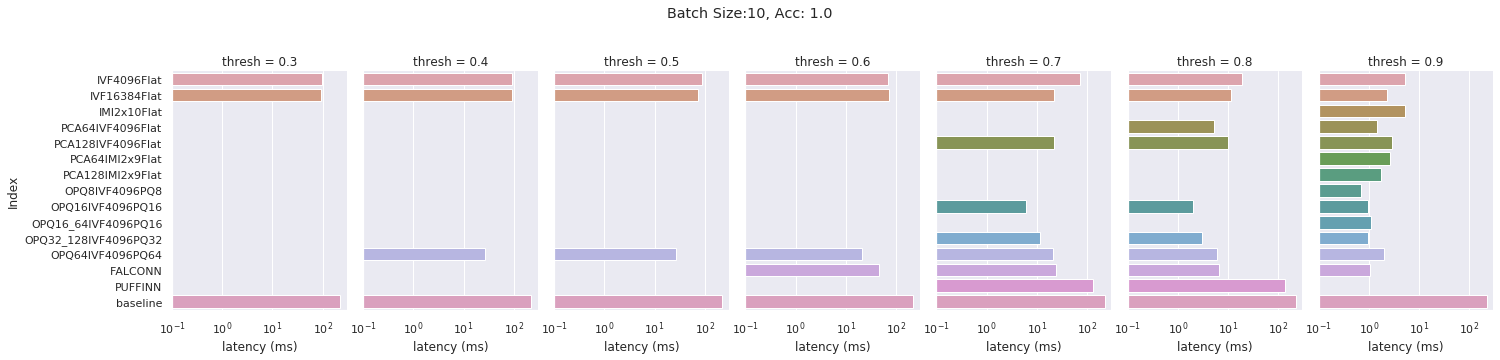

In [242]:
g = sns.catplot(x="latency", y="Index", col="thresh",
                data=df[(df.bs==10)&(df.acc==1.0)], saturation=.5,
                kind="bar", ci=None, aspect=.6)
for ax in g.axes[0]:
    ax.set_xscale('log')
    ax.set_xlim([0.1,300])
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Batch Size:10, Acc: 1.0')
g.set_xlabels('latency (ms)')
# g.map(plt.hist, 'latency')
# (g.set_axis_labels("", "Survival Rate")
#   .set_xticklabels(["Men", "Women", "Children"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True))

Text(0.5, 0, 'latency (ms)')

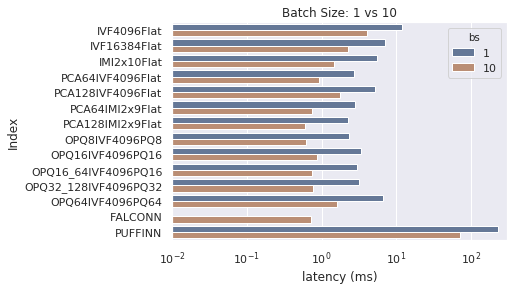

In [246]:
tempdf = df[(df.bs<100)&(df.thresh==0.9)&(df.Index!='baseline')]
ax = sns.barplot(x="latency", y="Index",
                data=tempdf, saturation=.5, hue="bs", ci=None)
#                 kind="bar", ci=None, aspect=.6)
ax.set_xscale('log')
ax.set_xlim([0.01,300])
ax.set_title('Batch Size: 1 vs 10')
ax.set_xlabel('latency (ms)')
# plt.subplots_adjust(top=0.8)
# g.fig.suptitle('Batch Size: 1 vs 10')
# g.set_xlabels('latency (ms)')


Text(0.5, 0, 'latency (ms)')

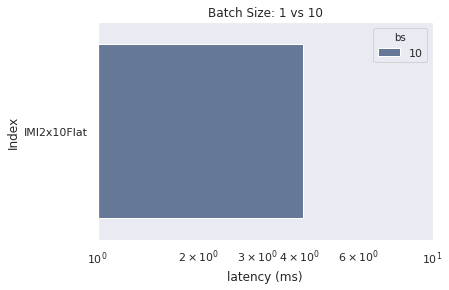

In [198]:
tempdf = df[(df.bs==10)&(df.thresh==0.9)&(df.Index=='IMI2x10Flat')&(df.diff9>0)&(df.acc>0.9)]
ax = sns.barplot(x="diff9", y="Index",
                data=tempdf, saturation=.5, hue="bs", ci=None)
#                 kind="bar", ci=None, aspect=.6)
ax.set_xscale('log')
ax.set_xlim([1,10])
ax.set_title('Batch Size: 1 vs 10')
ax.set_xlabel('latency (ms)')
# plt.subplots_adjust(top=0.8)
# g.fig.suptitle('Batch Size: 1 vs 10')
# g.set_xlabels('latency (ms)')


In [ ]:
g.se